In [188]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
from random import randrange

In [189]:
#Initialization
path = 'dataset'

In [190]:
data = []
images = []
classNo =[]
classNames =[]
myList = os.listdir(path)
print(myList)
row_length =784

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [191]:
classes = {0:'Zero',
           1:'One', 
           2: 'Two', 
           3: 'Three', 
           4: 'Foure',
           5: 'Five',
           6: 'Six',
           7: 'Seven',
           8: 'Eight', 
           9: 'Nine'}

In [192]:
classes[9]

'Nine'

In [193]:
#To know number of labels or classes
noOfClasses = len(myList)
print("Total number of classes detected", noOfClasses)

Total number of classes detected 10


In [194]:
def crop_img(img):
    #print(img.shape)
    if np.min(img)==255:
        return [0]
    a = np.where(img != 255)
    
    bbox = np.min(a[0]), np.max(a[0]), np.min(a[1]), np.max(a[1])
    # print(bbox)
    cropped_img=img[bbox[0]:bbox[1],bbox[2]:bbox[3]]
    return cropped_img

In [195]:
fullpath='dataset/0/36.jpg'
img = cv2.imread(fullpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)    
img.shape
print(img.shape)

#c_img=crop_img(img)



(137, 155)


(137, 155)


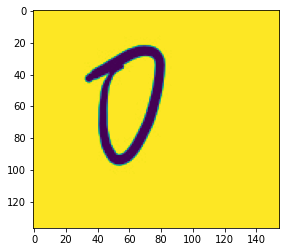

In [196]:
print(img.shape)
plt.imshow(img)

(87, 55)


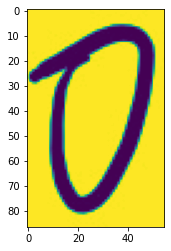

In [197]:
img = crop_img(img)
print(img.shape)
plt.imshow(img)

# Loading and Preprocess the image
Load the raw images from dataset folder and perform the following:
* **Read the image by cv2.read**
* **Change the RGB to Gray color(blak and white)**
* **Corp the image** - on the raw image there is an extra space at the sides of the digit so we have to crop just drop lines from the top, left, right, and bottom until they touch a pixel by calling the fuction called crop_img(currentImage)

* **Downsample the image** - the image size and rgb value is 137, 155, 3 so we have to  downsample it in to small size to 28x28
* **Create an intensity percentage** - the normal intensity range for RGB values is between 0 and 255. To
create input for the algorithm, simply divide the intensity by 255 to create an
intensity percentage.
* **Append the normailized image and the corrosponding lable to image lists and class list** 

In [198]:
def preProcessing():
    print("Importing classes ...")

    for x in range(0, noOfClasses):
        digitList = os.listdir(path + "/" + str(x) )
    
        for y in digitList:
            imagePath = path + "/" + str(x) + "/" +  str(y)
                
            currentImage = cv2.imread(imagePath)    
            currentImage = cv2.cvtColor(currentImage, cv2.COLOR_BGR2GRAY)    
            currentImage=crop_img(currentImage)

            # check the image is empty or not
            if(len(currentImage)==1):
                print("image do not have information: ",imagePath)
            else:
                currentImage = cv2.resize(currentImage, (28,28))  
                currentImage = currentImage/255
                images.append(currentImage)
                classNo.append(x) 
                classNames.append(classes[x])     
        
        
        print(x, end=" ")

In [199]:
preProcessing()


Importing classes ...
image do not have information:  dataset/0/18989.jpg
0 1 2 3 4 5 6 7 8 9 

In [200]:
print(len(images))
print(len(classNo))

4833
4833


In [201]:
# change from list into array 
images = np.array(images)
classNo = np.array(classNo)

In [202]:
print(images.shape)
print(classNo.shape)

(4833, 28, 28)
(4833,)


# To show digits dataset distrubution

In [203]:
# to know for each class how many images , 
numberOfSample = []
print(len(np.where(classNo==1)[0]))
for x in  range(0, noOfClasses):    
    numberOfSample.append(len(np.where(classNo==x)[0]))

print(numberOfSample)


487
[477, 487, 484, 483, 484, 485, 482, 484, 483, 484]


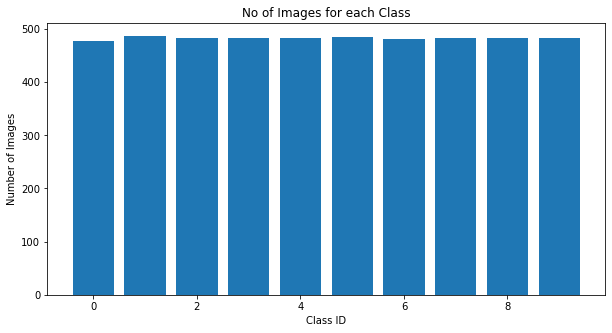

In [204]:
plt.figure(figsize=(10,5))
plt.bar(range(0,noOfClasses),numberOfSample)
plt.title("No of Images for each Class")
plt.xlabel("Class ID")
plt.ylabel("Number of Images")
plt.show()

# Flatten a 2d array into 1d array
* Reformat digits into feature vectors
* Takes a list of images stored as 2D-arrays and returns  a matrix in which each row is a fixed length feature vector corresponding to the image. so the image became flatten as one dimensional arrays.

In [205]:
def get_bounding_box_size(images):
    """Compute bounding box size given list of images."""
    height = max(image.shape[0] for image in images)
    width = max(image.shape[1] for image in images)
    return height, width

In [206]:

def images_to_feature_vectors(images, bbox_size=None):
    """Reformat digits into feature vectors.
    Takes a list of images stored as 2D-arrays and returns
    a matrix in which each row is a fixed length feature vector
    corresponding to the image.abs
    Params:
    images - a list of images stored as arrays
    bbox_size - an optional fixed bounding box size for each image
    """

    # If no bounding box size is supplied then compute a suitable
    # bounding box by examining sizes of the supplied images.
    if bbox_size is None:
        bbox_size = get_bounding_box_size(images)

    bbox_h, bbox_w = bbox_size
    # print(bbox_h, bbox_w)
    nfeatures = bbox_h * bbox_w
    # print(nfeatures)
    fvectors = np.empty((len(images), nfeatures))
   
    labels = []
    for i, image in enumerate(images):
        padded_image = np.ones(bbox_size) 
        # print(padded_image)
        h, w = image.shape
        h = min(h, bbox_h)
        w = min(w, bbox_w)
        # print(h, w)
        padded_image[0:h, 0:w] = image[0:h, 0:w]
        # print(padded_image)
        fvectors[i, :] = padded_image.reshape(1, nfeatures)
        
        # print(fvectors)
        
    return fvectors


In [207]:
images_vectors = images_to_feature_vectors(images)

In [208]:
# Since we will work with the images dataset,
#Prepare Columns
columns_value = []
for i in range(0,784):
    columns_value.append("pixel"+str(i))
data = pd.DataFrame(images_vectors,columns=columns_value)
labels = classNo

In [209]:
data.describe()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,...,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000,4833.000000
mean,0.999188,0.997501,0.994892,0.990745,0.985385,0.980453,0.973300,0.968181,0.961759,0.954708,...,0.945924,0.957250,0.966376,0.974285,0.978784,0.980197,0.981555,0.983707,0.989737,0.996355
std,0.008123,0.034272,0.054789,0.077260,0.097416,0.115070,0.135030,0.147602,0.162371,0.178849,...,0.199123,0.179075,0.157958,0.136060,0.125682,0.123182,0.118871,0.112123,0.083738,0.043390
min,0.627451,0.027451,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007843
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
# Now we create a DataFrame which will contain both the features and the label of the dataset:

data_df = data.join(pd.Series(classNames, name='class'))
# data.reset_index(drop=True, inplace=True)
data_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,1.000000,1.000000,1.000000,1.0,1.000000,0.992157,1.0,0.917647,0.835294,0.807843,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero
1,0.996078,0.996078,0.992157,1.0,0.996078,0.996078,1.0,0.992157,1.000000,0.996078,...,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,Zero
2,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.015686,0.160784,0.709804,0.988235,0.996078,0.996078,0.996078,1.0,Zero
3,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.996078,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero


# Data visualaziation before dimentionality reduction

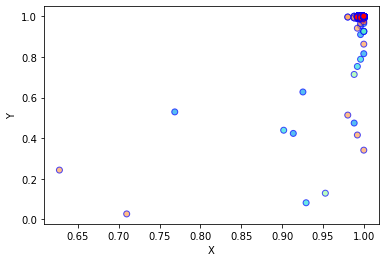

In [211]:
beforeReduced = np.array(data_df)
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(
beforeReduced[:,0],
beforeReduced[:,1],
c=labels,
cmap='rainbow',
alpha=0.7,
edgecolors='b'
)


In [212]:
# store the labels into a variable y
y = data_df['class']

# store the pixel data in X
X = data_df.drop("class", axis = 1)


In [213]:
# shape of data
print(X.shape)
print(y.shape)

(4833, 784)
(4833,)


# Visualize feature vector from dataframe

In [214]:
def displayImage(img,h,w):
    # display some random number from datset
    for i in [2, 488, 800, 3000,2000,4000]:
        index = i
        plt.figure(figsize = (3,3))
        grid_data = img.iloc[index].values.reshape(h,w)  # reshape from 1d to 2d pixel array
        plt.imshow(grid_data, interpolation = "none", cmap = 'gray')
        plt.show()
        # print the corresponding class label
        print("- "*50)
        print("class label:", y[index])

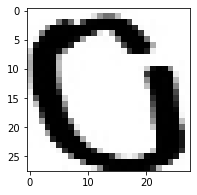

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: Zero


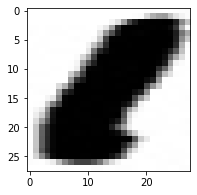

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: One


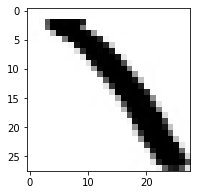

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: One


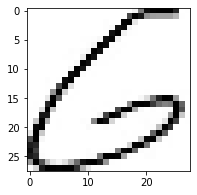

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: Six


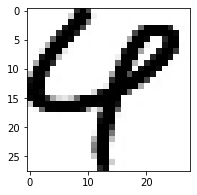

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: Foure


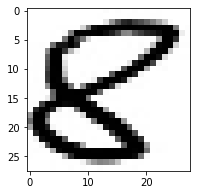

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
class label: Eight


In [215]:
displayImage(X,28,28)

In [216]:
# Assign from df values to x to change df value to array or list value
X = X.values

## DataFrame to a CSV

In [217]:
data_df.to_csv("digits.csv",index=False)

# Preprocess or reduce the dimenstions using PCA

# Steps involved in the PCA
Here is the short summary of the required steps:
* **Standardize the dataset** — our dataset has 784 features and a total of 4833
* **Calculate the covariance matrix for the features in the dataset** 
* **Calculate the eigenvalues and eigenvectors for the covariance matrix**
* **Pick K  eigenvalues and form eigenvectors**
* **Transform the original matrix**
* **Reconstruction from Principal Component**
* **Visualize the data**


# Standardize the dataset:
Standardize features by removing the mean and scaling to unit variance. The standard score of a sample x is calculated as: $$z = \frac{(x - u)}{s}$$
where $u$ is the mean of the training samples or zero if `with_mean=False`, and $s$ is the standard deviation of the training samples or one if `with_std=False`.

In [218]:
mean_ = X.mean(axis=0)

# print("mean",mean_)
std_ = X.std(axis=0)
# print("std",std_)

X_scaled = (X-mean_)/std_


# Calculate Covariance Matrix:
Variance reports variation of a single random variable, and covariance reports how much two random variables vary.
On the diagonal of the covariance matrix we have variances, and other elements are the covariances. Covariance matrix has larger diagonal values(variance) and non diagonal values (covariance) are very small.

The formula to calculate the covariance matrix:
$$Cov(x,y) =\frac{\sum_{i=1}^{n} (x_i - \overline{x}) (y_i - \overline{y})}{n-1}$$

In [219]:
print(f'Shape of X_scaled: {X_scaled.shape}')
features = X_scaled.T
print(f'Shape of features: {features.shape}')
cov_matrix = np.cov(features)
print(f'Shape of cov_matrix: {cov_matrix.shape}')
print('\nSneak Peak of the covariance matrix:\n')
cov_matrix[0:4, 0:4]

Shape of X_scaled: (4833, 784)
Shape of features: (784, 4833)
Shape of cov_matrix: (784, 784)

Sneak Peak of the covariance matrix:



array([[1.00020695, 0.69720738, 0.42034741, 0.27509654],
       [0.69720738, 1.00020695, 0.75066961, 0.52163815],
       [0.42034741, 0.75066961, 1.00020695, 0.83285507],
       [0.27509654, 0.52163815, 0.83285507, 1.00020695]])

# Calculate the eigenvalues and eigenvectors 
`Eigendecomposition is a process that decomposes a square matrix into eigenvectors and eigenvalues.` <font color='red'>Eigenvectors are simple unit vectors</font>, and <font color='green'>eigenvalues are coefficients which give the magnitude to the eigenvectors. </font>

It turns out, `eigenvectors of symmetric matrices are orthogonal.` For PCA this means that we have the first principal component which explains most of the variance. Orthogonal to that is the second principal component, which explains most of the remaining variance. This is repeated for N number of principal components, where N equals to number of original features.

And this turns out to be neat for us — principal components are sorted by percentage of variance explained, as we can decide how many should we keep. For example, if we have 100 features originally, but the first 3 principal components explain 95% of the variance, then it makes sense to keep only these 3 for visualizations and model training.

In [220]:
eig_values, eig_vectors = np.linalg.eig(cov_matrix)



print(f'First 10 eigenvalues: {eig_values[:10]}')
print(f'\n\nLast 10 eigenvalues: {eig_values[-10:]}')


First 10 eigenvalues: [46.00201811 45.20436599 39.64386582 29.19080541 27.00596755 20.70098051
 18.5258844  17.01146368 16.76665098 16.51060718]


Last 10 eigenvalues: [0.04039502 0.04301195 0.04272463 0.04017852 0.03903099 0.04057223
 0.04537092 0.0451991  0.04083947 0.04000564]


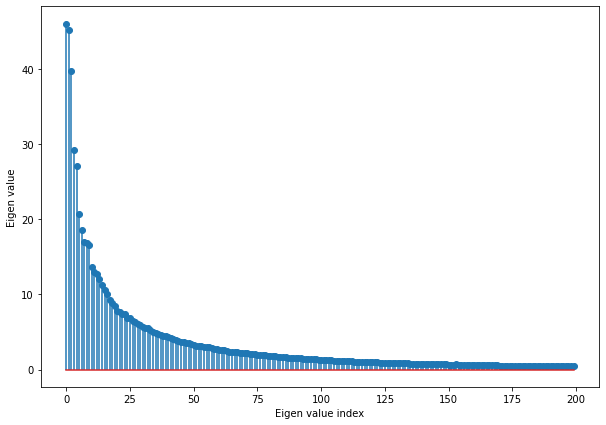

In [221]:
plt.figure(figsize=(10,7))
plt.stem(eig_values[:200], use_line_collection = True)
plt.xlabel('Eigen value index')
plt.ylabel('Eigen value')
plt.show()

In [222]:
for i in range(200):
    exp_var = np.sum(eig_values[:i+1])*100 / np.sum(eig_values)
    print(f'Eigenvectors upto {i+1} expresses {exp_var} % variance')

Eigenvectors upto 1 expresses 5.866390279463379 % variance
Eigenvectors upto 2 expresses 11.631060268392215 % variance
Eigenvectors upto 3 expresses 16.68662953807075 % variance
Eigenvectors upto 4 expresses 20.409176160503048 % variance
Eigenvectors upto 5 expresses 23.85310214574133 % variance
Eigenvectors upto 6 expresses 26.492986999763776 % variance
Eigenvectors upto 7 expresses 28.855493529127983 % variance
Eigenvectors upto 8 expresses 31.024874119413877 % variance
Eigenvectors upto 9 expresses 33.16303506093644 % variance
Eigenvectors upto 10 expresses 35.26854411160694 % variance
Eigenvectors upto 11 expresses 36.9993811812776 % variance
Eigenvectors upto 12 expresses 38.65700103191335 % variance
Eigenvectors upto 13 expresses 40.28422276808605 % variance
Eigenvectors upto 14 expresses 41.81661560761258 % variance
Eigenvectors upto 15 expresses 43.25339536216732 % variance
Eigenvectors upto 16 expresses 44.59440454767456 % variance
Eigenvectors upto 17 expresses 45.88045140749

# Visualizations
## Eigenvector Visualization

In [223]:
# Covariance Matrix
X_scaled[0].reshape((-1, 784)).shape

(1, 784)

In [224]:
# eigen vectors
eig_vectors[:, 0].reshape((784, -1)).shape

(784, 1)

# Pick K  eigenvalues and form eigenvectors

In [225]:
K= [2,3,5,10,20,50,100,200,300,500,700,780]

In [226]:
result_pca = []
for k in K:
    result = np.dot(X_scaled.reshape((-1, 784)), eig_vectors[:,:k].reshape((784, -1)))
    result_pca.append(result)
   

In [227]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['PC1'])
res2d['PC2'] = projected_2
res2d['Y'] = classNames
res2d.head()

,PC1,PC2,Y
0,-12.127916,-0.275827,Zero
1,-5.827806,2.770306,Zero
2,-15.128180,4.430799,Zero
3,-6.712795,6.661208,Zero
4,-6.651460,0.065163,Zero


## 2D Visualization

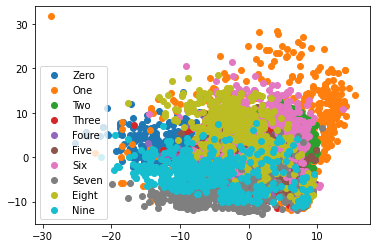

In [228]:
plt.figure(figsize=(6,4))
for label in myList:
    label_name = classes[int(label)]
    coords = res2d[res2d['Y']==label_name]
    x = coords['PC1'].values
    y = coords['PC2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

In [229]:
projected_1 = X_scaled.dot(eig_vectors.T[0])
projected_2 = X_scaled.dot(eig_vectors.T[1])
projected_3 = X_scaled.dot(eig_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['PC1'])
res3d['PC2'] = projected_2
res3d['PC3'] = projected_3
res3d['Y'] = classNames
res3d = res3d.head(500)
res3d

,PC1,PC2,PC3,Y
0,-12.127916,-0.275827,0.697123,Zero
1,-5.827806,2.770306,0.821922,Zero
2,-15.128180,4.430799,-8.788745,Zero
3,-6.712795,6.661208,0.731854,Zero
4,-6.651460,0.065163,-12.992523,Zero
...,...,...,...,...
495,-15.363573,-3.443633,9.781777,One
496,10.145469,12.072178,2.094404,One
497,1.056587,22.066192,16.064578,One
498,9.467737,15.519276,11.610935,One


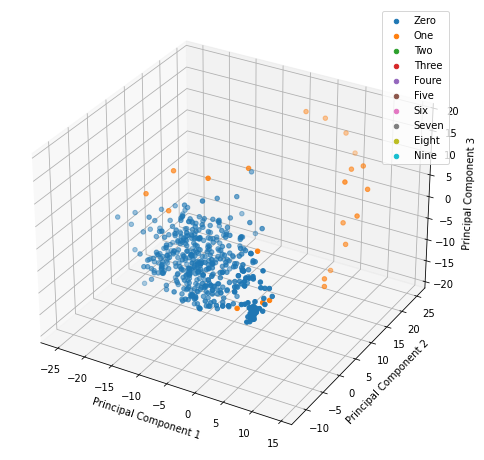

In [230]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')

for label in myList:
    label_name = classes[int(label)]
    coords = res3d[res3d['Y']==label_name]
    x = coords['PC1'].values
    y = coords['PC2'].values
    z = coords['PC3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.legend()

In [231]:
# Now we create a DataFrame which will contain both the features and the label of the dataset:
data_df = pd.DataFrame(X_scaled)
data_df = data.join(pd.Series(classNames, name='class'))
# data.reset_index(drop=True, inplace=True)
data_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,class
0,1.000000,1.000000,1.000000,1.0,1.000000,0.992157,1.0,0.917647,0.835294,0.807843,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero
1,0.996078,0.996078,0.992157,1.0,0.996078,0.996078,1.0,0.992157,1.000000,0.996078,...,0.996078,1.000000,1.000000,0.996078,1.000000,1.000000,1.000000,1.000000,1.0,Zero
2,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,0.000000,0.015686,0.160784,0.709804,0.988235,0.996078,0.996078,0.996078,1.0,Zero
3,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,0.996078,0.996078,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero
4,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,Zero


# Preprocess or reduce the dimensions using LDA

## Linear Discriminant Analysis steps to follows:

* Step 1 - Computing the within-class and between-class scatter matrices.
* Step 2 - Computing the eigenvectors and their corresponding eigenvalues for the scatter matrices.
* Step 3 - Sorting the eigenvalues and selecting the top k.
* Step 4 - Creating a new matrix that will contain the eigenvectors mapped to the k eigenvalues.
* Step 5 - Obtaining new features by taking the dot product of the data and the matrix from Step 4.

### Within-class scatter matrix
To calculate the within-class scatter matrix, you can use the following mathematical expression:
$$Sw =\sum_{1=1}^{c} S_i$$
where, c = total number of distinct classes and
$$S_i =\sum_{x \in D_i}^{n} (x - m_i) (x - m_i)^T$$

$$m_i =\frac{1}{n_i} \sum_{x \in D_i}^{n} x_k $$


where, x = a sample (i.e. a row).
       n = total number of samples within a given class.

Now we create a vector with the mean values of each feature:

In [232]:
# select unique class type

class_target= np.unique(classNames)
class_target

array(['Eight', 'Five', 'Foure', 'Nine', 'One', 'Seven', 'Six', 'Three',
       'Two', 'Zero'], dtype='<U5')

In [233]:
feature_means1 = pd.DataFrame(columns=class_target)

for c, rows in data_df.groupby('class'):
    
    # rows = rows.drop(['class'], axis=1)
    feature_means1[c] = rows.mean()
feature_means1

,Eight,Five,Foure,Nine,One,Seven,Six,Three,Two,Zero
pixel0,0.999667,0.999668,0.999668,0.999878,0.999485,0.996872,0.999943,0.998733,0.998250,0.999720
pixel1,0.999602,0.997396,0.999587,0.999830,0.999082,0.990593,0.999870,0.995015,0.994361,0.999704
pixel2,0.998474,0.997283,0.996411,0.999887,0.998583,0.979898,0.999553,0.989599,0.989507,0.999786
pixel3,0.996679,0.994558,0.994912,0.999044,0.997576,0.969535,0.999593,0.977006,0.979663,0.998972
pixel4,0.991848,0.991470,0.993567,0.995641,0.996046,0.958580,0.998446,0.971161,0.962105,0.995084
...,...,...,...,...,...,...,...,...,...,...
pixel779,0.985191,0.999280,0.996394,0.958751,0.978862,0.965662,0.986234,0.997783,0.937822,0.996268
pixel780,0.989088,0.999547,0.996492,0.963223,0.982905,0.977394,0.991962,0.998717,0.917363,0.999161
pixel781,0.992547,0.999628,0.995633,0.974267,0.985602,0.978869,0.994598,0.999724,0.917056,0.999425
pixel782,0.997158,0.999652,0.996840,0.981397,0.989105,0.989289,0.998959,0.999870,0.945876,0.999425


In [234]:
# The mean vectors (mi ) are now plugged into the above equations to obtain the within-class scatter matrix:

In [235]:
withinclass_scatter_matrix = np.zeros((row_length,row_length))
for c, rows in data_df.groupby('class'):
    rows = rows.drop(['class'], axis=1)


    s = np.zeros((row_length,row_length))

    for index, row in rows.iterrows():
       
        x, mc = row.values.reshape(row_length,1),feature_means1[c].values.reshape(row_length,1)
        
        s += (x - mc).dot((x - mc).T)

withinclass_scatter_matrix += s

# Between-class scatter matrix
We can calculate the between-class scatter matrix using the following mathematical expression:

Between-class scatter matrix
$$S_B =\sum_{i=1}^{c} N_i (m_i-m) (m_i-m)^T$$
where,


$$m_i =\frac{1}{n_i} \sum_{x \in D_i}^{n} x_k $$
and

$$m =\frac{1}{n} \sum_{i}^{n} x_i $$


In [236]:
feature_means2 = data_df.mean()

betweenclass_scatter_matrix = np.zeros((row_length,row_length))
for c in feature_means1:
    n = len(data_df.loc[data_df['class'] == c].index)
    
    mc, m = feature_means1[c].values.reshape(row_length,1), feature_means2.values.reshape(row_length,1)
  
    betweenclass_scatter_matrix += n * (mc - m).dot((mc - m).T)

## Calculate the eigen values and eigen vector
Now we will solve the generalized eigenvalue problem to obtain the linear discriminants for:

In [237]:
eigen_values, eigen_vectors = np.linalg.eig(np.linalg.inv(withinclass_scatter_matrix).dot(betweenclass_scatter_matrix))

# Sort eigenvalues and thier corresponding eigenvectors
* We will sort the eigenvalues from the highest to the lowest since the eigenvalues with the highest values carry the most information about the distribution of data is done. Next, we will pick first k eigenvectors. Finally, we will place the eigenvalues in a temporary array to make sure the eigenvalues map to the same eigenvectors after the sorting is done:

In [238]:
eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:,i]) for i in range(len(eigen_values))]
eigen_pairs = sorted(eigen_pairs, key=lambda x: x[0], reverse=True)

for pair in eigen_pairs:
    print(pair[0])

4.189669242252426e+18
5820913784119113.0
5820913784119113.0
3102273881401085.0
713150431092260.0
713150431092260.0
469655118663525.0
240512913992661.1
23019069992574.664
21638.77168125946
21638.77168125946
2491.6355952680383
2491.6355952680383
2379.450690613731
2270.098673412506
2270.098673412506
1985.7532687967757
1985.7532687967757
1872.9164105569926
1394.3570476675036
1117.6707698983105
1117.6707698983105
943.5396344054062
896.6413398968149
896.6413398968149
850.2134197123942
836.0476893967965
836.0476893967965
799.9116922018048
752.832445661146
752.832445661146
674.0086443828012
674.0086443828012
633.2040394365774
579.6567195268294
579.6567195268294
547.0050874354162
547.0050874354162
538.902058521746
538.902058521746
509.76162226895457
509.76162226895457
474.75140334405995
440.23470477449763
440.23470477449763
435.1912981314728
435.1912981314728
380.01508238762307
380.01508238762307
362.1943255571313
362.1943255571313
346.5565219661864
346.5565219661864
333.0863940318534
333.08639

In [239]:
#Now we will transform the values into percentage since it is difficult to understand how much of the variance
#is explained by each component.

In [240]:
sum_of_eigen_values = sum(eigen_values)
print('Explained Variance')
for i, pair in enumerate(eigen_pairs):
    print('Eigenvector {}: {}'.format(i, (pair[0]/sum_of_eigen_values).real))

Explained Variance
Eigenvector 0: 1.0017953177473509
Eigenvector 1: 0.0013918435649126603
Eigenvector 2: 0.0013918435649126603
Eigenvector 3: 0.0007417873032589767
Eigenvector 4: 0.00017052199622651898
Eigenvector 5: 0.00017052199622651898
Eigenvector 6: 0.00011229962835449253
Eigenvector 7: 5.750924408679189e-05
Eigenvector 8: 5.504109084530559e-06
Eigenvector 9: 5.17406480050332e-15
Eigenvector 10: 5.17406480050332e-15
Eigenvector 11: 5.957770717791102e-16
Eigenvector 12: 5.957770717791102e-16
Eigenvector 13: 5.689524453691749e-16
Eigenvector 14: 5.428051930482446e-16
Eigenvector 15: 5.428051930482446e-16
Eigenvector 16: 4.748151254566865e-16
Eigenvector 17: 4.748151254566865e-16
Eigenvector 18: 4.478346098794796e-16
Eigenvector 19: 3.334058802384965e-16
Eigenvector 20: 2.672471928751229e-16
Eigenvector 21: 2.672471928751229e-16
Eigenvector 22: 2.2561055138286097e-16
Eigenvector 23: 2.1439666094606252e-16
Eigenvector 24: 2.1439666094606252e-16
Eigenvector 25: 2.0329524210744907e-16
E

In [241]:
#First, we will create a new matrix W using the first two eigenvectors:

W_matrix = np.hstack((eigen_pairs[0][1].reshape(784,1), eigen_pairs[1][1].reshape(784,1))).real


In [242]:
#Next, we will save the dot product of X and W into a new matrix Y:
#Y = X∗W

#where, X = n x d matrix with n sample and d dimensions.
#       Y = n x k matrix with n sample and k dimensions.

#In simple terms, Y is the new matrix or the new feature space.

In [243]:
X_lda = np.array(X_scaled.dot(W_matrix))
X_lda.shape

(4833, 2)

In [244]:
projected_1 = X_scaled.dot(eigen_vectors.T[0])
projected_2 = X_scaled.dot(eigen_vectors.T[1])
res2d = pd.DataFrame(projected_1, columns=['LDA1'])
res2d['LDA2'] = projected_2
res2d['Y'] = classNames
res2d.head()

,LDA1,LDA2,Y
0,-0.034237+0.000000j,-0.021674+0.003841j,Zero
1,-0.129321+0.000000j,-0.005327+0.002110j,Zero
2,-0.015626+0.000000j,-0.038403+0.013679j,Zero
3,-0.031686+0.000000j,-0.026927+0.009776j,Zero
4,-0.061457+0.000000j,0.040289-0.029533j,Zero


## 2D Visualization

C:\Users\Sinte\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


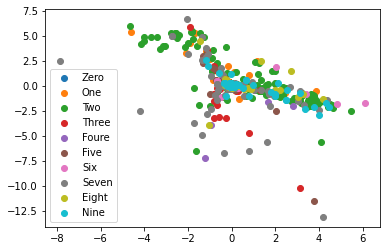

In [245]:
plt.figure(figsize=(6,4))
for label in myList:
    label_name = classes[int(label)]
    coords = res2d[res2d['Y']==label_name]
    x = coords['LDA1'].values
    y = coords['LDA2'].values
    plt.scatter(x, y, label=label_name)

plt.legend()
plt.show()

## 3D Visualization

In [246]:
projected_1 = X_scaled.dot(eigen_vectors.T[0])
projected_2 = X_scaled.dot(eigen_vectors.T[1])
projected_3 = X_scaled.dot(eigen_vectors.T[2])
res3d = pd.DataFrame(projected_1, columns=['LDA1'])
res3d['LDA2'] = projected_2
res3d['LDA3'] = projected_3
res3d['Y'] = classNames
res3d = res3d.head()
res3d

,LDA1,LDA2,LDA3,Y
0,-0.034237+0.000000j,-0.021674+0.003841j,-0.021674-0.003841j,Zero
1,-0.129321+0.000000j,-0.005327+0.002110j,-0.005327-0.002110j,Zero
2,-0.015626+0.000000j,-0.038403+0.013679j,-0.038403-0.013679j,Zero
3,-0.031686+0.000000j,-0.026927+0.009776j,-0.026927-0.009776j,Zero
4,-0.061457+0.000000j,0.040289-0.029533j,0.040289+0.029533j,Zero


C:\Users\Sinte\anaconda3\lib\site-packages\numpy\core\_asarray.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)
C:\Users\Sinte\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


C:\Users\Sinte\anaconda3\lib\site-packages\matplotlib\colors.py:271: ComplexWarning: Casting complex values to real discards the imaginary part
  c = tuple(map(float, c))


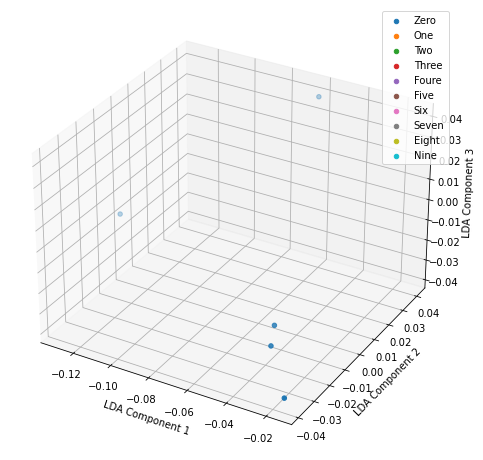

In [247]:
fig = plt.figure(figsize=(8,10))
ax = fig.add_subplot(projection='3d')

for label in myList:
    label_name = classes[int(label)]
    coords = res3d[res3d['Y']==label_name]
    x = coords['LDA1'].values
    y = coords['LDA2'].values
    z = coords['LDA3'].values
    ax.scatter3D(x, y, z, label=label_name)
    
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
ax.legend()

In [248]:
W_matrix = np.hstack((eigen_pairs[0][1].reshape(784,1), eigen_pairs[1][1].reshape(784,1))).real
X_lda = np.array(X.dot(W_matrix))
X_lda.shape

(4833, 2)

In [249]:
result_lda=[]
for k in K:
    result = np.dot(X_scaled.reshape((-1, 784)), eigen_vectors[:,:k].reshape((784, -1)))
    result_lda.append(result)

# Prepare Data for Training and Testing
* Prepare a DataFrame which will contain both the features and the label of the dataset from the reduced one
* Shuffle the dataset
* Store the labels into a variable y
* Store the pixel data in X
* Split the data and the label for testing 20% and for training 80%

In [250]:
def prepareDataForTrainingTesting(reducedData):
    # df = pd.DataFrame(data_reconstructed_pca,columns=columns_value)
    df = pd.DataFrame(reducedData)
    # Now we create a DataFrame which will contain both the features and the label of the dataset:
    # df = pd.read_csv("digits.csv")
    df = df.join(pd.Series(classNo, name='class'))

    # Shuffle your dataset 
    shuffle_df = df.sample(frac=1)

    shuffle_df = shuffle_df.reset_index(drop=True)
    shuffle_df

    # store the labels into a variable y
    y = shuffle_df['class']

    # store the pixel data in X
    X = shuffle_df.drop("class", axis = 1)
    X= X.values

    split = int(X.shape[0] * 0.80)
    X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]
    print(X_train.shape, y_train.shape)
    print(X_test.shape, y_test.shape)
    return X_test, y_test, X_train, y_train


# Handwritten Digit Classification using KNN
Used k-nearest neighbor (KNN) to locate the nearby projections made by the training images, to do this
* **Step 1: Calculate Euclidean Distance**-We can calculate the straight line distance between two vectors using the Euclidean distance measure. It is calculated as the square root of the sum of the squared differences between the two vectors.
$$distance =\sqrt{\sum_{i=1}^{n} (p1_i-p2_i)^2}$$
* **Step 2: Get Nearest Neighbors** -
Neighbors for a new piece of data in the dataset are the k closest instances(for our case k=5), as defined by our distance measure.
To locate the neighbors for a new piece of data within a dataset we must first calculate the distance between each record in the dataset to the new piece of data. We can do this using our distance function prepared above.
Once distances are calculated, we must sort all of the records in the training dataset by their distance to the new data. We can then select the top k to return as the most similar neighbors.
We can do this by keeping track of the distance for each record in the dataset as a tuple, sort the list of tuples by the distance (in descending order) and then retrieve the neighbors.
* **Step 3: Make Predictions,** -
The most similar neighbors collected from the training dataset can be used to make predictions.In the case of classification, we can return the most represented class among the neighbors.
We can achieve this by performing the argmax() function on the list of output values from the neighbors. Given a list of class values observed in the neighbors, the argmax() function takes a set of unique class values and calls the count on the list of class values for each class value in the set.

* **Step 4: Measure Accuracy**- we are tried to show accuracy levels with different numbers of eigenvectors for pca and lda



In [251]:
# Calculate the Euclidean distance between two vectors
def euclidean(p1, p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [252]:
def knn(X_train, y_train, test_point, k=5):
    
    distances = [] # Contains list of tuples (distance, label
    
    for data_point, label in zip(X_train, y_train):
        distances.append((euclidean(test_point, data_point), label))
 
    
    sorted_distances = sorted(distances, key=lambda x: x[0])
    k_nearest_neighbors = np.array(sorted_distances[:k])
    freq = np.unique(k_nearest_neighbors[:,1], return_counts=True)
    labels, counts = freq
    majority_vote = labels[counts.argmax()]
    return majority_vote

In [259]:
def calculate_accuracy(X_test, y_test, X_train, y_train, k=5):
    
    predictions = []
    
    for test_point in X_test:
        
        pred_label = knn(X_train, y_train, test_point, k)
        predictions.append(pred_label)
    
    predictions = np.array(predictions)

    
    
  
    accuracy = (predictions == y_test).sum() / y_test.shape[0]
    return accuracy

In [260]:
accuracy_list_pca= []

for pca in result_pca:
    X_test, y_test, X_train, y_train=prepareDataForTrainingTesting(pca)
    accuracy=calculate_accuracy(X_test, y_test, X_train, y_train, k=5)
    accuracy_list_pca.append(accuracy)



(3866, 2) (3866,)
(967, 2) (967,)
(3866, 3) (3866,)
(967, 3) (967,)
(3866, 5) (3866,)
(967, 5) (967,)
(3866, 10) (3866,)
(967, 10) (967,)
(3866, 20) (3866,)
(967, 20) (967,)
(3866, 50) (3866,)
(967, 50) (967,)
(3866, 100) (3866,)
(967, 100) (967,)
(3866, 200) (3866,)
(967, 200) (967,)
(3866, 300) (3866,)
(967, 300) (967,)
(3866, 500) (3866,)
(967, 500) (967,)
(3866, 700) (3866,)
(967, 700) (967,)
(3866, 780) (3866,)
(967, 780) (967,)


In [263]:
accuracy_list_lda = []
for lda in result_lda:
    X_test, y_test, X_train, y_train=prepareDataForTrainingTesting(lda)
    accuracy=calculate_accuracy(X_test, y_test, X_train, y_train, k=5)
    accuracy_list_lda.append(accuracy)

(3866, 2) (3866,)
(967, 2) (967,)
(3866, 3) (3866,)
(967, 3) (967,)
(3866, 5) (3866,)
(967, 5) (967,)
(3866, 10) (3866,)
(967, 10) (967,)
(3866, 20) (3866,)
(967, 20) (967,)
(3866, 50) (3866,)
(967, 50) (967,)
(3866, 100) (3866,)
(967, 100) (967,)
(3866, 200) (3866,)
(967, 200) (967,)
(3866, 300) (3866,)
(967, 300) (967,)
(3866, 500) (3866,)
(967, 500) (967,)
(3866, 700) (3866,)
(967, 700) (967,)
(3866, 780) (3866,)
(967, 780) (967,)


In [261]:
i =0
for accyracy in accuracy_list_pca:
    print("When the eigenvector value {} the accuracy result {}%".format(K[i],accyracy*100))
    i=i+1

When the eigenvector value 2 the accuracy result 39.0899689762151%
When the eigenvector value 3 the accuracy result 50.568769389865565%
When the eigenvector value 5 the accuracy result 71.56153050672181%
When the eigenvector value 10 the accuracy result 85.10858324715616%
When the eigenvector value 20 the accuracy result 87.28024819027922%
When the eigenvector value 50 the accuracy result 88.62461220268872%
When the eigenvector value 100 the accuracy result 85.52223371251293%
When the eigenvector value 200 the accuracy result 81.90279214064115%
When the eigenvector value 300 the accuracy result 79.11065149948294%
When the eigenvector value 500 the accuracy result 77.86970010341263%
When the eigenvector value 700 the accuracy result 77.14581178903826%
When the eigenvector value 780 the accuracy result 77.66287487073423%


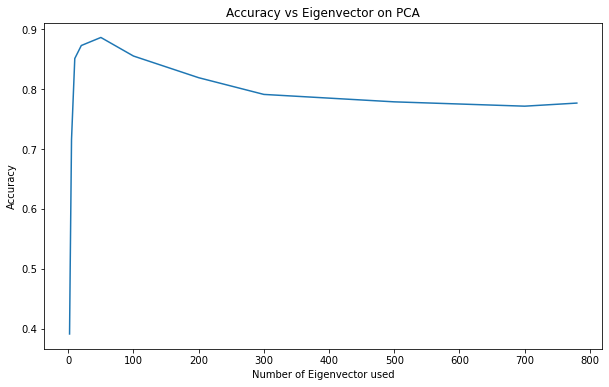

In [262]:
plt.figure(figsize=(10,6))
plt.plot(K, accuracy_list_pca)
plt.title('Accuracy vs Eigenvector on PCA')
plt.xlabel('Number of Eigenvector used')
plt.ylabel('Accuracy')
plt.show()

In [264]:
i =0
for accyracy in accuracy_list_lda:
    print("When the eigenvector value {} the accuracy result {}%".format(K[i],accyracy*100))
    i=i+1

When the eigenvector value 2 the accuracy result 21.302998965873837%
When the eigenvector value 3 the accuracy result 24.095139607032056%
When the eigenvector value 5 the accuracy result 16.75284384694933%
When the eigenvector value 10 the accuracy result 21.406411582213032%
When the eigenvector value 20 the accuracy result 25.12926577042399%
When the eigenvector value 50 the accuracy result 18.924508790072387%
When the eigenvector value 100 the accuracy result 15.201654601861428%
When the eigenvector value 200 the accuracy result 14.37435367114788%
When the eigenvector value 300 the accuracy result 15.822130299896585%
When the eigenvector value 500 the accuracy result 16.75284384694933%
When the eigenvector value 700 the accuracy result 13.857290589451912%
When the eigenvector value 780 the accuracy result 16.546018614270942%


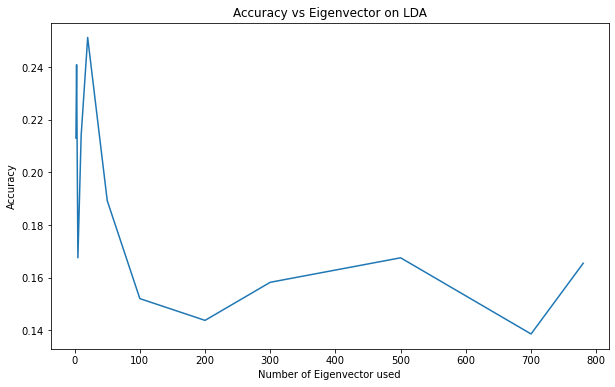

In [266]:
plt.figure(figsize=(10,6))
plt.plot(K, accuracy_list_lda)
plt.title('Accuracy vs Eigenvector on LDA')
plt.xlabel('Number of Eigenvector used')
plt.ylabel('Accuracy')
plt.show()